## King County House Sales Project Submission

Please fill out:
* Student names: Andrew Boucher, Jon McCaffrey
* Student pace: full time
* Scheduled project review date/time: 10/28/22 15:00 EST
* Instructor name: Daniel Burdeno



In [1]:
# Your code here - remember to use markdown cells for comments as well!

# Overview

# Business Challenge

# Data Understanding

## Initial imports

In [197]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import itertools
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
import time as time
!pip install haversine
import haversine as hs

## Loaded data, initial exploratory data analysis

In [185]:
df = pd.read_csv('.\data\kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [195]:
# checking size of initial dataframe
df.shape

(21597, 21)

In [186]:
# Exploring the size of the data set, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Some of the features may require an alteration in data type for better numeric evaluation and potential fit to our model
- date
- zipcode
- grade
- condition
- etc
- We chose condition as one categorical feature to explore, partially to avoid adding too many more features with one hot encoding ALL categorical variables, and we will explain why we it was the most relevant categorical feature for us to explore.  

In [208]:
# as an example, to illustrate value counts we would have to consider with 
# multiple categorical features to transform
len(df['zipcode'].value_counts()), len(df['view'].value_counts()), len(df['waterfront'].value_counts()), len(df['grade'].value_counts())

(70, 5, 2, 11)

In [187]:
# obtaining statistics for numeric columns
df.describe()
# noted likely outliers for bedrooms and sqft_lot15.  Will address below

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [188]:
# checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [189]:
# looking at correlation for numeric portion of dataframe
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.022137,-0.261570,-0.001199,0.344842,0.731767,0.195077
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.225209,-0.347210,-0.148370,0.409993,0.326377,0.070777
yr_renovated,-0.012010,0.129599,0.018495,0.051050,0.055660,0.004513,0.003535,0.022137,-0.225209,1.000000,0.069846,0.032145,-0.072156,-0.000247,0.003852


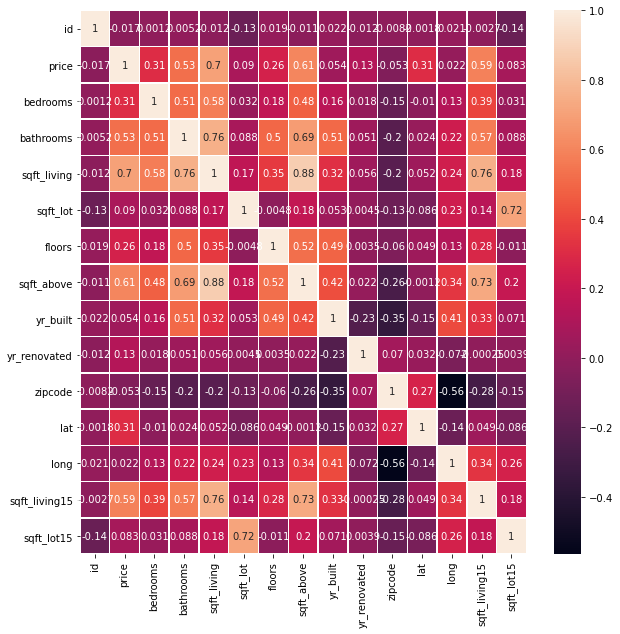

In [190]:
# producing a heatmap of correlations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax);

We want to include as many numeric features as we can and would like to include as many relevant categorical features as well to improve our model

# Data Preparation

## Create a new column that converts date into a time stamp

In [192]:
# df2 - added timestamp
# creating new column that converts date into a time stamp which is the number of seconds since 1/1/1970 (aka UTC)
df2 = df.copy()
df2['time_stamp'] = [time.mktime(time.strptime(x, '%m/%d/%Y')) for x in df['date']]
df2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.413173e+09
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.418101e+09
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1.424840e+09
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.418101e+09
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1.424236e+09


In [196]:
# sanity check to ensure only one column added to original dataframe
df2.shape

(21597, 22)

# Creating a new dataframe with column for distance from downtown Seattle

In [198]:
# initializing and formatting location variables
# loc 1 equals lat/long of each house in dataset
# loc 2 equals defined lat/long of Seattle from Google
loc1 = list(zip(df2['lat'], df2['long']))
loc2 = (47.6050, -122.3344)

In [226]:
# df3 - created new column to convert lat/long to distance from downtown Seattle
# in miles
df3 = df2.copy()
df3['dist_Seattle'] = [hs.haversine((x,y), loc2, unit='mi') for x,y in loc1]
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,dist_Seattle
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.413173e+09,7.418041
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.418101e+09,8.046810
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1.424840e+09,10.323554
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.418101e+09,6.427255
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1.424236e+09,13.504920


In [227]:
# confirming only one more column added
df3.shape

(21597, 23)

# Creating a new dataframe with column for ordinal-encoded condition

## Quick explanation of why not other categoricals

In [210]:
# ordinal encoding condition
categories = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]
ords = OrdinalEncoder(categories=categories)

In [228]:
# df4 - create dataframe of only 'condition'
df4 = pd.DataFrame(df3['condition'])

In [229]:
# fit to ordinal encoder and transform
ords.fit(df4)
cond = ords.transform(df4)
cond

array([[2.],
       [2.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

In [241]:
# df5 - new dataframe with ordinal encoding taking place of grade
df5 = pd.DataFrame(cond, df4.index, columns=['ord_cond'])
# reset df5 dataframe to index of df4

In [231]:
df4.value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
dtype: int64

In [232]:
df5.value_counts()

2.0    14020
3.0     5677
4.0     1701
1.0      170
0.0       29
dtype: int64

In [242]:
# df6 - concatenate df3 and df5 (ordinal encoded condition)
df6 = pd.concat([df3, df5], axis=1)
df6.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,dist_Seattle,ord_cond
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1.413173e+09,7.418041,2.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.418101e+09,8.046810,2.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1.424840e+09,10.323554,2.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.418101e+09,6.427255,4.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1.424236e+09,13.504920,2.0


In [243]:
df6.shape

(21597, 24)

## Trimming dataframe to remove irrelevant categorical and numeric features

## Explanation of why these are being dropped

In [245]:
# df7 - creating dataframe with only numeric columns
df7 = df6.select_dtypes(include='number')
df7.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,time_stamp,dist_Seattle,ord_cond
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,1.413173e+09,7.418041,2.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.418101e+09,8.046810,2.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,NaN,98028,47.7379,-122.233,2720,8062,1.424840e+09,10.323554,2.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,1.418101e+09,6.427255,4.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,1.424236e+09,13.504920,2.0


In [276]:
# df8 - created dataframe with only relevant numerics included
df8 = df7.drop(['yr_renovated', 'zipcode', 'lat', 'long'], axis=1)

In [277]:
df8.shape

(21597, 14)

In [278]:
df8.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,time_stamp,dist_Seattle,ord_cond
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,1340,5650,1.413173e+09,7.418041,2.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1690,7639,1.418101e+09,8.046810,2.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,2720,8062,1.424840e+09,10.323554,2.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,1360,5000,1.418101e+09,6.427255,4.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,1800,7503,1.424236e+09,13.504920,2.0


## Investigating for Outliers

In [279]:
for column in df8.columns:
    rvs = stats.norm(loc=df8[column].mean(), scale=df8[column].std())
    IQR = rvs.ppf(0.75) - rvs.ppf(0.25)
    upper = rvs.ppf(0.75) + (1.5*IQR)
    lower = rvs.ppf(0.25) - (1.5*IQR)
    print([column, lower, upper])

['id', -3180840729.4084797, 12341789304.950453]
['price', -450847.60668237554, 1531440.7536935345]
['bedrooms', 0.8740835415323494, 5.872316421425469]
['bathrooms', 0.04113816755141686, 4.190514376783444]
['sqft_living', -396.690833578044, 4557.334534092004]
['sqft_lot', -96630.18764399773, 126829.00516494972]
['floors', 0.03805435879181829, 2.9501384457643702]
['sqft_above', -444.6650559673178, 4021.8587402753233]
['yr_built', 1891.7464985531415, 2050.252853208677]
['sqft_living15', 137.8965983619844, 3835.3440369114332]
['sqft_lot15', -60827.042639815634, 86343.6096630133]
['time_stamp', 1388215665.5854847, 1440927828.0108483]
['dist_Seattle', -6.31042261892084, 29.308841402496142]
['ord_cond', 0.6546799855346104, 4.164970891902071]


In [275]:
# for column in df8.columns:
    # rvs = stats.norm(loc=df8[column].mean(), scale=df8[column].std())
    # IQR = rvs.ppf(0.75) - rvs.ppf(0.25)
    # upper = rvs.ppf(0.75) + (1.5*IQR)
    # lower = rvs.ppf(0.25) - (1.5*IQR)
    # df9 = df8.drop(df8[(df8[column] >= upper) | (df8[column] <= lower)].index)

### Outlier in Bedrooms

In [280]:
df8['bedrooms'].value_counts()
# reveals one house with '33' bedrooms

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [281]:
beds_outlier = df8.loc[df8['bedrooms'] > 11]
beds_outlier
# looks like the number '3' entered twice by mistake.  Will impute to '3'

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,time_stamp,dist_Seattle,ord_cond
15856,2402100895,640000.0,33,1.75,1620,6000,1.0,1040,1947,1330,4700,1.403669e+09,5.723124,4.0


In [282]:
# Imputing 33 to 3
df8['bedrooms'] = df8['bedrooms'].replace([33], 3)

In [283]:
# checking that it's gone
df8['bedrooms'].describe()

count    21597.000000
mean         3.371811
std          0.904096
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

### Outliers in sqft_lot15

In [284]:
df8['sqft_lot15'].describe()
# large difference between max and 75%

count     21597.000000
mean      12758.283512
std       27274.441950
min         651.000000
25%        5100.000000
50%        7620.000000
75%       10083.000000
max      871200.000000
Name: sqft_lot15, dtype: float64

In [285]:
# calculating interquartile range for sqft_lot15
IQR_sqft_lot15 = rvs_sqft_lot15.ppf(0.75) - rvs_sqft_lot15.ppf(0.25)
IQR_sqft_lot15

36792.663075707234

In [286]:
# calculating outliers via IQR range
upper_sqft_lot15 = rvs_sqft_lot15.ppf(0.75) + (1.5*IQR_sqft_lot15)
upper_sqft_lot15

86343.6096630133

In [287]:
lower_sqft_lot15 = rvs_sqft_lot15.ppf(0.25) - (1.5*IQR_sqft_lot15)
lower_sqft_lot15
# this yields a negative number, 
# so we won't be eliminating any values at the lower end of sqft_lot15 data

-60827.042639815634

In [288]:
# creating a dataframe (df_lot for reduced outliers of sqft_lot15) 
# with sqft_lot15 values above the upper_sqft_lot15 threshold removed
df9.drop(df8[df8['sqft_lot15'] >= upper_sqft_lot15].index, inplace=True)

In [289]:
df9.shape

(21161, 14)

In [290]:
len(df8) - len(df9)

436

In [292]:
436 / len(df8)

0.020187989072556374

- That would remove 2.0% of values from df8

## Removing price outliers

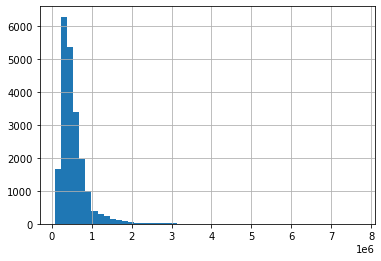

In [295]:
# quick histogram to visualize potential skewness
df9['price'].hist(bins=50);

In [296]:
# calculating interquartile range for price
IQR_price = rvs_price.ppf(0.75) - rvs_price.ppf(0.25)
IQR_price

495874.44485276565

In [297]:
# calculating outliers via IQR range
upper_price = rvs_price.ppf(0.75) + (1.5*IQR_price)
upper_price

1530456.1767277117

In [298]:
lower_price = rvs_price.ppf(0.25) - (1.5*IQR_price)
lower_price
# this yields a negative number, so we won't be eliminating any values at the lower end of price data

-453041.602683351

In [301]:
# df10 - creating a dataframe with price values above the upper_price 
# threshold removed
df10 = df9.drop(df9[df9['price'] >= upper_price].index)

In [302]:
df10.shape

(20677, 14)

# Modeling

## Creating models based on highest correlations to price with dataframe (df9)

In [306]:
df9.shape

(21161, 14)

In [307]:
df9.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,time_stamp,dist_Seattle,ord_cond
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1180,1955,1340,5650,1.413173e+09,7.418041,2.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,2170,1951,1690,7639,1.418101e+09,8.046810,2.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,770,1933,2720,8062,1.424840e+09,10.323554,2.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1050,1965,1360,5000,1.418101e+09,6.427255,4.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1680,1987,1800,7503,1.424236e+09,13.504920,2.0


In [309]:
df9drop = df9.drop(['id', 'price'], axis=1)

In [310]:
ss_df9 = StandardScaler().fit(df9drop)
df9_scaled = ss_df9.transform(df9drop)

In [311]:
df9_scaled = pd.DataFrame(df9_scaled, columns=df9drop.columns)

In [316]:
x1 = sm.add_constant(df9_scaled)
y1 = df9['price'].reset_index(drop=True)

In [317]:
model1 = sm.OLS(endog=y1, exog=x1).fit()

In [318]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     3290.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:22:31   Log-Likelihood:            -2.9006e+05
No. Observations:               21161   AIC:                         5.801e+05
Df Residuals:                   21148   BIC:                         5.802e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           5.39e+05   1493.027    360.997      0.000    5.36e+05    5.42e+05
bedrooms      -5.252e+04   1887.450    -27.827      0.000   -5.62e+04   -4.88e+04
bathrooms      4.183e+04   2697.261     15.510      0.000    3.65e+04    4.71e+04
sqft_living    1.811e+05   4220.372     42.909      0.000    1.73e+05    1.89e+05
sqft_lot       4346.6355   1782.130      2.439      0.015     853.525    7839.746
floors        -2342.1096   2151.605     -1.089      0.276   -6559.419    1875.200
sqft_above     5.535e+04   3838.812     14.419      0.000    4.78e+04    6.29e+04
yr_built      -3.814e+04   2175.106    -17.534      0.000   -4.24e+04   -3.39e+04
sqft_living15  6.141e+04   2410.687     25.475      0.000    5.67e+04    6.61e+04
sqft_lot15     9681.8977   1942.345      4.985      0.000    5874.754    1.35e+04
time_stamp     1.218e+04   1497.399      8.133      0.000    9242.604    1.51e+04
dist_Seattle  -1.255e+05   1816.935    -69.046      0.000   -1.29e+05   -1.22e+05
ord_cond       2.204e+04   1644.174     13.404      0.000    1.88e+04    2.53e+04
==============================================================================
Omnibus:                    17523.396   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1287137.184
Skew:                           3.523   Prob(JB):                         0.00
Kurtosis:                      40.552   Cond. No.                         7.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## check assumptions

## Repeat assessment with lower price dataframe (df10)

In [315]:
df10.shape

(20677, 14)

In [319]:
df10drop = df10.drop(['id', 'price'], axis=1)

In [320]:
ss_df10 = StandardScaler().fit(df10drop)
df10_scaled = ss_df10.transform(df10drop)

In [321]:
df10_scaled = pd.DataFrame(df10_scaled, columns=df10drop.columns)

In [322]:
x2 = sm.add_constant(df10_scaled)
y2 = df10['price'].reset_index(drop=True)

In [323]:
model2 = sm.OLS(endog=y2, exog=x2).fit()

In [324]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     3357.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        13:23:03   Log-Likelihood:            -2.7513e+05
No. Observations:               20677   AIC:                         5.503e+05
Df Residuals:                   20664   BIC:                         5.504e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.011e+05   1011.492    495.392      0.000    4.99e+05    5.03e+05
bedrooms      -2.369e+04   1288.832    -18.377      0.000   -2.62e+04   -2.12e+04
bathrooms       2.79e+04   1770.455     15.759      0.000    2.44e+04    3.14e+04
sqft_living    9.224e+04   2716.355     33.957      0.000    8.69e+04    9.76e+04
sqft_lot       7866.9891   1203.200      6.538      0.000    5508.621    1.02e+04
floors         1.182e+04   1475.458      8.013      0.000    8931.019    1.47e+04
sqft_above      3.12e+04   2510.424     12.428      0.000    2.63e+04    3.61e+04
yr_built      -2.547e+04   1487.236    -17.128      0.000   -2.84e+04   -2.26e+04
sqft_living15  7.161e+04   1630.210     43.924      0.000    6.84e+04    7.48e+04
sqft_lot15     8380.1980   1309.322      6.400      0.000    5813.823    1.09e+04
time_stamp     8505.0462   1014.703      8.382      0.000    6516.149    1.05e+04
dist_Seattle  -1.061e+05   1238.157    -85.716      0.000   -1.09e+05   -1.04e+05
ord_cond       1.996e+04   1112.274     17.941      0.000    1.78e+04    2.21e+04
==============================================================================
Omnibus:                     3148.009   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7918.873
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                       5.501   Cond. No.                         7.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

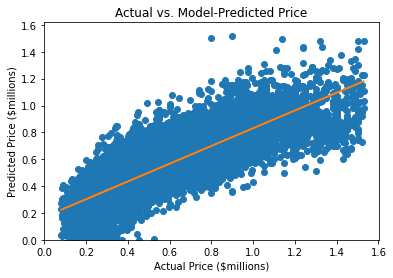

In [336]:
# predicted vs. actual
model2_pred = model2.predict(x2)


y = model2_pred / 1000000
x = df10['price'] / 1000000

plt.plot(x,y, "o")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.xlabel('Actual Price ($millions)')
plt.ylabel('Predicted Price ($millions)')
plt.title('Actual vs. Model-Predicted Price')
plt.savefig('./model_act_pred', bbox_inches='tight', dpi=300);

# Bar plot

In [359]:
x_bar = model2.params.map(abs).sort_values(ascending=False).index[1:13]
print(x_bar)

Index(['dist_Seattle', 'sqft_living', 'sqft_living15', 'sqft_above',
       'bathrooms', 'yr_built', 'bedrooms', 'ord_cond', 'floors', 'time_stamp',
       'sqft_lot15', 'sqft_lot'],
      dtype='object')


In [358]:
y_bar= model2.params.map(abs).sort_values(ascending=False)[1:13]
print(y_bar)

dist_Seattle     106129.569402
sqft_living       92240.081416
sqft_living15     71605.969638
sqft_above        31198.729286
bathrooms         27900.356551
yr_built          25473.588086
bedrooms          23685.390981
ord_cond          19955.315940
floors            11823.032642
time_stamp         8505.046174
sqft_lot15         8380.197976
sqft_lot           7866.989114
dtype: float64


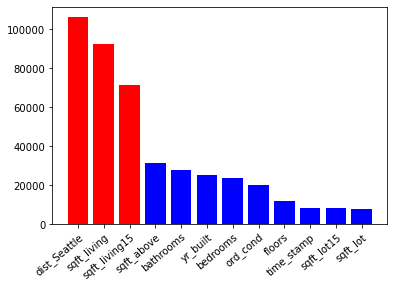

In [372]:
plt.bar(x = x_bar, height = y_bar, color=['red', 'red', 'red', 'blue', 'blue','blue','blue','blue','blue','blue','blue','blue'])
plt.xticks(rotation=40, ha="right", rotation_mode='anchor')
# plt.xlabel('Features')
# plt.ylabel('Absolute change in price ($) per standard deviation of feature')
plt.savefig('./coefs', bbox_inches='tight', dpi=300);

In [139]:
#create numeric df with 'id', 'yr_renovated' and 'zipcode' dropped. 
# BUT keeping price 
df_hd_num_price = df_hd_numeric_all.drop(['yr_renovated', 'zipcode', 'id'], axis=1)
df_hd_num_price.shape

(21190, 12)

In [140]:
# info from Andrew, with tweaks for my dataframe variable names
# installing and importing haversine library for geo-location calculations
!pip install haversine
import haversine as hs

In [141]:
# initializing and formatting location variables
loc1 = list(zip(df_hd_num_price['lat'], df_hd_num_price['long']))
loc2 = (47.6050, -122.3344)
# creating new dataframe from original df_hd with new column for house distance from downtown seattle
df_hd_w_loc = df_hd_num_price.copy()
df_hd_w_loc['Distance_from_DTSeattle'] = [hs.haversine((x,y), loc2, unit='mi') for x,y in loc1]
df_hd_w_loc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Distance_from_DTSeattle
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,7.418041
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,8.046810
2,180000.0,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,10.323554
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,6.427255
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,13.504920


In [142]:
# adding in ordinal encoded condition from above
df_hd_ord_loc = pd.concat([df_hd_w_loc, cond_encoded], axis=1)
df_hd_ord_loc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,7.418041,2.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,8.046810,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,10.323554,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,6.427255,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,13.504920,2.0


In [143]:
# relevant numeric df (with price) and with ordinal encoded condition & loc
df_hd_ord_loc.shape

(21190, 14)

In [144]:
df_42 = df_hd_ord_loc.copy()

In [145]:
# now removing outlier high prices, as defined WAAAAAAY higher up in this JN
df_hd_ord_loc_lp = df_42.drop(df_42[df_42['price'] >= upper_price].index)
df_hd_ord_loc_lp.shape

(20706, 14)

In [146]:
df_hd_ord_loc_lp.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
0,221900.0,3,1.00,1180,5650,1.0,1180,1955,47.5112,-122.257,1340,5650,7.418041,2.0
1,538000.0,3,2.25,2570,7242,2.0,2170,1951,47.7210,-122.319,1690,7639,8.046810,2.0
2,180000.0,2,1.00,770,10000,1.0,770,1933,47.7379,-122.233,2720,8062,10.323554,2.0
3,604000.0,4,3.00,1960,5000,1.0,1050,1965,47.5208,-122.393,1360,5000,6.427255,4.0
4,510000.0,3,2.00,1680,8080,1.0,1680,1987,47.6168,-122.045,1800,7503,13.504920,2.0


In [147]:
# same 499 values removed as before
df_hd_ord_loc.shape[0] - df_hd_ord_loc_lp.shape[0]

484

In [148]:
df_x_drop = df_hd_ord_loc_lp.drop(['price', 'lat', 'long'], axis=1)

In [149]:
ss_ords_loc_lp = StandardScaler().fit(df_x_drop)
df_hd_ord_loc_lp_scaled = ss_ords_loc_lp.transform(df_x_drop)

In [150]:
df_hd_ord_loc_lp_scaled = pd.DataFrame(df_hd_ord_loc_lp_scaled, columns=df_x_drop.columns)

In [151]:
df_hd_ord_loc_lp_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
0,-0.394651,-1.476516,-1.019630,-0.228544,-0.899855,-0.733885,-0.534288,-0.939480,-0.408880,-0.617686,-0.629674
1,-0.394651,0.234996,0.681593,-0.165769,0.956054,0.577850,-0.670448,-0.397470,-0.197370,-0.521117,-0.629674
2,-1.511454,-1.476516,-1.521430,-0.057017,-0.899855,-1.277128,-1.283167,1.197590,-0.152388,-0.171442,-0.629674
3,0.722152,1.261903,-0.064987,-0.254174,-0.899855,-0.906133,-0.193889,-0.908508,-0.478001,-0.769856,2.451146
4,-0.394651,-0.107306,-0.407679,-0.132725,-0.899855,-0.071392,0.554989,-0.227123,-0.211832,0.317169,-0.629674


In [152]:
df_hd_ord_loc_lp_c = sm.add_constant(df_hd_ord_loc_lp_scaled)
y = df_hd_ord_loc_lp['price'].reset_index(drop=True)

In [153]:
df_hd_ord_loc_lp_c.head()

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,Distance_from_DTSeattle,0
0,1.0,-0.394651,-1.476516,-1.019630,-0.228544,-0.899855,-0.733885,-0.534288,-0.939480,-0.408880,-0.617686,-0.629674
1,1.0,-0.394651,0.234996,0.681593,-0.165769,0.956054,0.577850,-0.670448,-0.397470,-0.197370,-0.521117,-0.629674
2,1.0,-1.511454,-1.476516,-1.521430,-0.057017,-0.899855,-1.277128,-1.283167,1.197590,-0.152388,-0.171442,-0.629674
3,1.0,0.722152,1.261903,-0.064987,-0.254174,-0.899855,-0.906133,-0.193889,-0.908508,-0.478001,-0.769856,2.451146
4,1.0,-0.394651,-0.107306,-0.407679,-0.132725,-0.899855,-0.071392,0.554989,-0.227123,-0.211832,0.317169,-0.629674


In [154]:
model_num_ords_loc_lp = sm.OLS(endog=y, exog=df_hd_ord_loc_lp_c).fit()

In [155]:
# all numerics (- irrelevant), + distance to Seattle, +ordinal encoding
model_num_ords_loc_lp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     3648.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:02:57   Log-Likelihood:            -2.7556e+05
No. Observations:               20706   AIC:                         5.511e+05
Df Residuals:                   20694   BIC:                         5.512e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5.009e+05   1012.920    494.472      0.000    4.99e+05    5.03e+05
bedrooms                 -2.55e+04   1313.580    -19.410      0.000   -2.81e+04   -2.29e+04
bathrooms                2.824e+04   1776.633     15.897      0.000    2.48e+04    3.17e+04
sqft_living              9.364e+04   2729.695     34.305      0.000    8.83e+04     9.9e+04
sqft_lot                 7705.1643   1204.682      6.396      0.000    5343.892    1.01e+04
floors                   1.136e+04   1477.452      7.687      0.000    8461.883    1.43e+04
sqft_above               3.131e+04   2514.561     12.453      0.000    2.64e+04    3.62e+04
yr_built                -2.545e+04   1486.938    -17.117      0.000   -2.84e+04   -2.25e+04
sqft_living15            7.106e+04   1630.674     43.577      0.000    6.79e+04    7.43e+04
sqft_lot15               8212.3265   1310.788      6.265      0.000    5643.080    1.08e+04
Distance_from_DTSeattle -1.057e+05   1240.201    -85.243      0.000   -1.08e+05   -1.03e+05
0                        1.987e+04   1107.209     17.949      0.000    1.77e+04     2.2e+04
==============================================================================
Omnibus:                     3143.501   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7890.303
Skew:                           0.855   Prob(JB):                         0.00
Kurtosis:                       5.494   Cond. No.                         7.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [156]:
# coefficients from above model
model_num_ords_loc_lp.params

const                      500860.495122
bedrooms                   -25496.715269
bathrooms                   28242.803869
sqft_living                 93643.025790
sqft_lot                     7705.164336
floors                      11357.805822
sqft_above                  31314.936617
yr_built                   -25451.405942
sqft_living15               71059.359390
sqft_lot15                   8212.326469
Distance_from_DTSeattle   -105719.038873
0                           19872.912768
dtype: float64

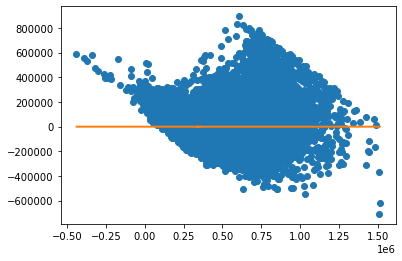

In [157]:
model_preds_num_ords_loc_lp = model_num_ords_loc_lp.predict(df_hd_ord_loc_lp_c)
resids_num_ords_loc_lp = y - model_preds_num_ords_loc_lp

# fig, ax = plt.subplots()

x=model_preds_num_ords_loc_lp
y=resids_num_ords_loc_lp

# ax.scatter(model_preds_num_ords_loc_lp, resids_num_ords_loc_lp)
plt.plot(x,y, "o")
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b)

# ax.set_xlabel('predictions')
# ax.set_ylabel('residual')
# plt.suptitle('Residuals Vs. Predictions');

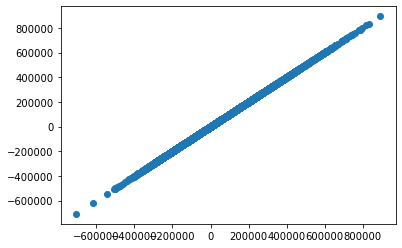

In [158]:
# second scatterplot for independence

fig, ax = plt.subplots()

ax.scatter(y, resids_num_ords_loc_lp);

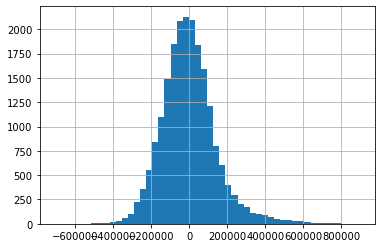

In [159]:
# creating histogram of residuals (errors) to check if errors are normally distributed, which they appear to be

resids_num_ords_loc_lp.hist(bins=50);

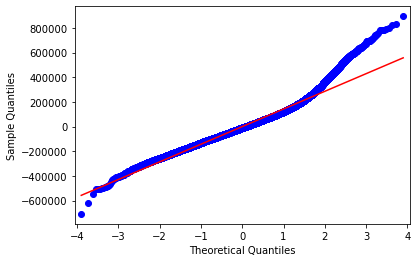

In [160]:
sm.qqplot(resids_num_ords_loc_lp, line='r');

In [166]:
# upper portion of table with ALL prices in, and no LOC
model_num_ords.summary().tables[0]

Dep. Variable:,price,R-squared:,0.627
Model:,OLS,Adj. R-squared:,0.627
Method:,Least Squares,F-statistic:,2966.
Date:,"Thu, 27 Oct 2022",Prob (F-statistic):,0.00
Time:,11:02:59,Log-Likelihood:,-2.9116e+05
No. Observations:,21190,AIC:,5.824e+05
Df Residuals:,21177,BIC:,5.825e+05
Df Model:,12,,
Covariance Type:,nonrobust,,


In [167]:
# most recent model, removed outlier prices and added LOC
model_num_ords_loc_lp.summary().tables[0]

Dep. Variable:,price,R-squared:,0.660
Model:,OLS,Adj. R-squared:,0.660
Method:,Least Squares,F-statistic:,3648.
Date:,"Thu, 27 Oct 2022",Prob (F-statistic):,0.00
Time:,11:02:59,Log-Likelihood:,-2.7556e+05
No. Observations:,20706,AIC:,5.511e+05
Df Residuals:,20694,BIC:,5.512e+05
Df Model:,11,,
Covariance Type:,nonrobust,,


In [168]:
# all prices, no LOC. All coeffs significant
model_num_ords.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.387e+05,1542.707,349.196,0.000,5.36e+05,5.42e+05
bedrooms,-5.859e+04,1981.877,-29.561,0.000,-6.25e+04,-5.47e+04
bathrooms,4.769e+04,2790.146,17.091,0.000,4.22e+04,5.32e+04
sqft_living,2.075e+05,4367.446,47.505,0.000,1.99e+05,2.16e+05
sqft_lot,2385.6908,1841.738,1.295,0.195,-1224.255,5995.636
floors,1.182e+04,2198.981,5.374,0.000,7506.897,1.61e+04
sqft_above,2.92e+04,3957.672,7.379,0.000,2.14e+04,3.7e+04
yr_built,-6.638e+04,2194.292,-30.250,0.000,-7.07e+04,-6.21e+04
lat,8.223e+04,1605.066,51.233,0.000,7.91e+04,8.54e+04
long,-3.346e+04,1865.663,-17.934,0.000,-3.71e+04,-2.98e+04


In [169]:
# most recent model, all prices, added LOC.  
model_num_ords_loc_lp.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,5.009e+05,1012.920,494.472,0.000,4.99e+05,5.03e+05
bedrooms,-2.55e+04,1313.580,-19.410,0.000,-2.81e+04,-2.29e+04
bathrooms,2.824e+04,1776.633,15.897,0.000,2.48e+04,3.17e+04
sqft_living,9.364e+04,2729.695,34.305,0.000,8.83e+04,9.9e+04
sqft_lot,7705.1643,1204.682,6.396,0.000,5343.892,1.01e+04
floors,1.136e+04,1477.452,7.687,0.000,8461.883,1.43e+04
sqft_above,3.131e+04,2514.561,12.453,0.000,2.64e+04,3.62e+04
yr_built,-2.545e+04,1486.938,-17.117,0.000,-2.84e+04,-2.25e+04
sqft_living15,7.106e+04,1630.674,43.577,0.000,6.79e+04,7.43e+04
sqft_lot15,8212.3265,1310.788,6.265,0.000,5643.080,1.08e+04


In [170]:
# model with ALL prices, no LOC
model_num_ords.summary().tables[2]

Omnibus:,17148.261,Durbin-Watson:,2.000
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1114949.433
Skew:,3.436,Prob(JB):,0.00
Kurtosis:,37.865,Cond. No.,7.67


In [171]:
# most recent model, outlier prices removed, added LOC
model_num_ords_loc_lp.summary().tables[2]

#JB number way down, DW still at 2, Omnibus & skew & kurtosis improved

Omnibus:,3143.501,Durbin-Watson:,2.008
Prob(Omnibus):,0.000,Jarque-Bera (JB):,7890.303
Skew:,0.855,Prob(JB):,0.00
Kurtosis:,5.494,Cond. No.,7.23


In [172]:
df_hd_ord_loc_lp_nolatlong = df_x_drop = df_hd_ord_loc_lp.drop(['lat', 'long'], axis=1)

In [173]:
df_hd_ord_loc_lp_nolatlong.corr()['price']

price                      1.000000
bedrooms                   0.317768
bathrooms                  0.484611
sqft_living                0.655820
sqft_lot                   0.082164
floors                     0.274406
sqft_above                 0.555495
yr_built                   0.051572
sqft_living15              0.589480
sqft_lot15                 0.125017
Distance_from_DTSeattle   -0.324448
0                          0.039088
Name: price, dtype: float64

In [174]:
df_hd_ord_loc_lp_nolatlong_corrs = df_hd_ord_loc_lp_nolatlong.corr()['price'].map(abs).sort_values(ascending=False)
df_hd_ord_loc_lp_nolatlong_corrs

price                      1.000000
sqft_living                0.655820
sqft_living15              0.589480
sqft_above                 0.555495
bathrooms                  0.484611
Distance_from_DTSeattle    0.324448
bedrooms                   0.317768
floors                     0.274406
sqft_lot15                 0.125017
sqft_lot                   0.082164
yr_built                   0.051572
0                          0.039088
Name: price, dtype: float64

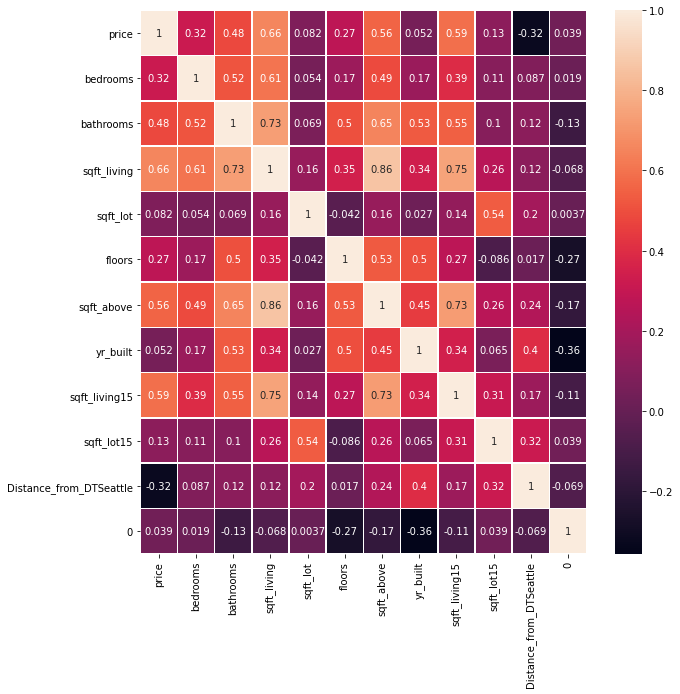

In [175]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_hd_ord_loc_lp_nolatlong.corr(), annot=True, linewidths=.5, ax=ax);

# Checking date range in data set

In [176]:
pd.to_datetime(df_hd['date']).min()

Timestamp('2014-05-02 00:00:00')

In [177]:
pd.to_datetime(df_hd['date']).max()

Timestamp('2015-05-27 00:00:00')

# Calculating how target feature coefficients translate to dollar amount changes in price

In [378]:
df10.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,sqft_living15,sqft_lot15,time_stamp,dist_Seattle,ord_cond
count,2.067700e+04,2.067700e+04,20677.000000,20677.000000,20677.000000,2.067700e+04,20677.000000,20677.000000,20677.000000,20677.000000,20677.000000,2.067700e+04,20677.000000,20677.000000
mean,4.637006e+09,5.010846e+05,3.355951,2.079581,2014.171205,1.143092e+04,1.485322,1734.667215,1970.752382,1946.856749,9495.029937,1.414558e+09,11.444662,2.412149
std,2.876535e+09,2.497208e+05,0.918054,0.730027,816.870649,2.533359e+04,0.538954,754.729725,29.351381,645.840555,9408.055366,9.755611e+06,6.511162,0.643346
min,1.000102e+06,8.000000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,460.000000,651.000000,1.399003e+09,0.717448,1.000000
25%,2.171400e+09,3.190000e+05,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,1180.000000,1951.000000,1470.000000,5030.000000,1.406002e+09,6.139622,2.000000
50%,3.999300e+09,4.450000e+05,3.000000,2.250000,1880.000000,7.492000e+03,1.000000,1540.000000,1974.000000,1810.000000,7500.000000,1.413432e+09,10.320219,2.000000
75%,7.376300e+09,6.250000e+05,4.000000,2.500000,2480.000000,1.020000e+04,2.000000,2140.000000,1996.000000,2310.000000,9793.000000,1.424149e+09,15.560955,3.000000
max,9.900000e+09,1.530000e+06,33.000000,7.500000,7480.000000,1.164794e+06,3.500000,7320.000000,2015.000000,5790.000000,86248.000000,1.432699e+09,48.023035,4.000000


- Average (mean) house, in our model based on y-intercept value (const): $500,900

Other average features to be aware of:
    - bedrooms: 3 (3.35)
    - bathrooms: 2 (2.08)
    - sqft_living: 2,013 sq ft 
    - sqft_lot: 11,450 sq ft
    - floors: 1 (1.48)
    - sqft_above: 1,734 sq ft
    - yr_built: 1970
    - sqft_living15: 1,947 sq ft
    - sqft_lot15: 9,495 sq ft
    - distance from downtown Seattle: 11.44 miles
    - condition: average (2.41 out of 4)

In [180]:
df_hd_ord_loc_lp['sqft_living'].std()
# coef = 9.364 x 10^4 = $93,640

817.0789310520772

- Housing price increases by $93,640 for every 817 sqft_living increase

In [181]:
df_hd_ord_loc_lp['sqft_living15'].std()
# coef = 7.106 x 10^4 = $71,060

645.7595647094573

- Housing price increases by $71,060 for every 646 sqft_living15 increase

In [182]:
df_hd_ord_loc_lp['Distance_from_DTSeattle'].std()
# coef = - 1.057 x 10^5 = (-)$105,700

6.511199267844617

- Housing price *decreases* by $105,700 for every 6.5 miles away from city center